# Joe Wehbe - 202000908 - Part 2

### Load the data preprocessed in part I, question 1. Preprocess again by encoding categorical attributes into numeric. 

Importing necessary libraries for data preprocessing

In [19]:
import pandas as pd
import numpy as np

Obtaining the preprocessed data from part 1

In [20]:
import pickle

with open('preprocessed_dataset.pkl', 'rb') as file:
    data = pickle.load(file)

data

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pip
0,ID12101,4.0,FEMALE,INNER_CITY,1.0,NO,2.0,NO,NO,NO,NO,YES
1,ID12102,3.0,MALE,TOWN,3.0,YES,6.0,YES,NO,YES,YES,NO
2,ID12103,4.0,FEMALE,INNER_CITY,1.0,YES,0.0,YES,YES,YES,NO,NO
3,ID12104,0.0,FEMALE,TOWN,1.0,YES,6.0,NO,NO,YES,NO,NO
4,ID12105,5.0,FEMALE,RURAL,5.0,YES,0.0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,6.0,FEMALE,INNER_CITY,5.0,NO,4.0,YES,YES,YES,YES,NO
596,ID12697,1.0,FEMALE,INNER_CITY,0.0,YES,0.0,YES,YES,YES,NO,NO
597,ID12698,1.0,FEMALE,TOWN,1.0,YES,0.0,YES,YES,NO,NO,YES
598,ID12699,1.0,MALE,INNER_CITY,1.0,YES,0.0,NO,YES,NO,YES,NO


Encoding categorical attributes into numerical attributes

In [21]:
data = pd.get_dummies(data, columns=['sex','region','married','car','save_act','current_act','mortgage','pip'])
data

,id,age,income,children,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,car_NO,car_YES,save_act_NO,save_act_YES,current_act_NO,current_act_YES,mortgage_NO,mortgage_YES,pip_NO,pip_YES
0,ID12101,4.0,1.0,2.0,True,False,True,False,False,False,...,True,False,True,False,True,False,True,False,False,True
1,ID12102,3.0,3.0,6.0,False,True,False,False,False,True,...,False,True,True,False,False,True,False,True,True,False
2,ID12103,4.0,1.0,0.0,True,False,True,False,False,False,...,False,True,False,True,False,True,True,False,True,False
3,ID12104,0.0,1.0,6.0,True,False,False,False,False,True,...,True,False,True,False,False,True,True,False,True,False
4,ID12105,5.0,5.0,0.0,True,False,False,True,False,False,...,True,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,6.0,5.0,4.0,True,False,True,False,False,False,...,False,True,False,True,False,True,False,True,True,False
596,ID12697,1.0,0.0,0.0,True,False,True,False,False,False,...,False,True,False,True,False,True,True,False,True,False
597,ID12698,1.0,1.0,0.0,True,False,False,False,False,True,...,False,True,False,True,True,False,True,False,False,True
598,ID12699,1.0,1.0,0.0,False,True,True,False,False,False,...,True,False,False,True,True,False,False,True,True,False


### Split the transformed data into training and test sets (using 80%-20% randomized split)

In [22]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 480
Test set size: 120


### Use scikit-learn to build a decision tree (using default parameters). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Compare the performance scores on the test and the training data sets. What does the comparison tell you? 

Importing necessary libraries

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

Splitting features and target variable for training and test sets


In [24]:
X_train = train_data.drop(['pip_NO', 'id'], axis=1)
y_train = train_data['pip_YES']
X_test = test_data.drop(['pip_NO', 'id'], axis=1)
y_test = test_data['pip_YES']

Building, and training the decision tree classifier and predicting the training and test sets

In [25]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Generating and visualizing the confusion matrix for training and test sets

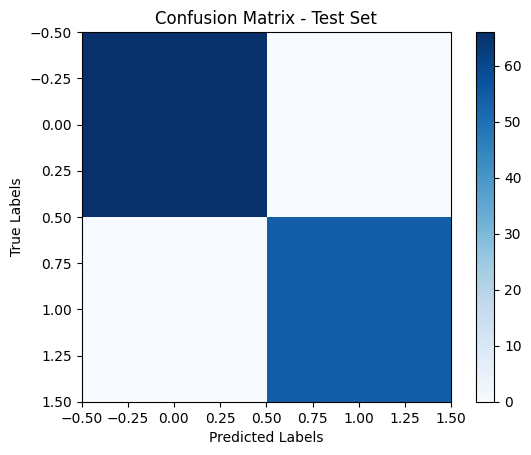

In [26]:
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

plt.imshow(test_confusion_matrix, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Generating the classification report for training and test sets

In [27]:
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Classification Report - Training Set:")
print("-------------------------------------")
print(train_classification_report)
print()
print("Classification Report - Test Set:")
print("---------------------------------")
print(test_classification_report)
print()

Classification Report - Training Set:
-------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       260
        True       1.00      1.00      1.00       220

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480


Classification Report - Test Set:
---------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        66
        True       1.00      1.00      1.00        54

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120




The performance scores on the training and test sets are identical, with precision, recall, and F1-score all equal to 1.00 for both classes (True and False). The accuracy is also 1.00 for both sets. This suggests that the model is not overfitting and is able to generalize well to unseen data, which is a positive indication of its performance.

### In the following, you will use 10-fold cross validation to determine the best depth of the decision tree (the depth of the tree can be specified as input parameter. To this end, you will perform cross validation on the training dataset created in part (2) and leave the test data set apart for final evaluation. 

### Specify the number of depths you want to test. You may want to look at the tree created in question 3 in order to make a choice. 

In [28]:
depths = range(1, 11)

### Iterate over the different depths and perform 10-fold cross-validation with a decision tree of the corresponding depth and collect the mean accuracy score for each iteration.

In [29]:
from sklearn.model_selection import cross_val_score

mean_scores = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    mean_score = scores.mean()
    mean_scores.append(mean_score)

### Plot the obtained accuracy scores for different iterations and explain what should be the optimal depth of the tree.

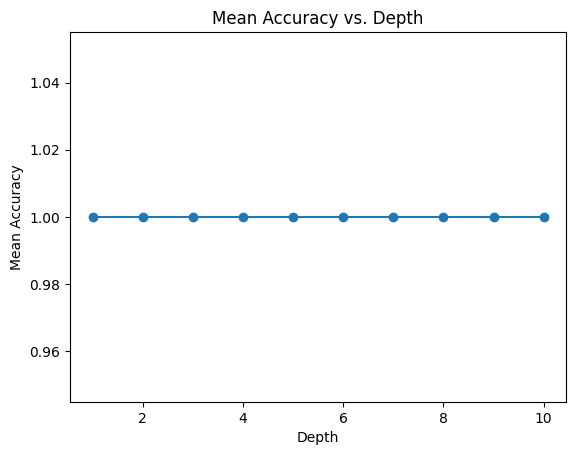

In [30]:
plt.plot(depths, mean_scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Depth')
plt.show()

Since for any depth of the tree the mean accuracy is 1, then the optimal depth of the tree is 1.

### Build a decision tree with the depth selected above using the training dataset. 

In [31]:
optimal_depth = depths[np.argmax(mean_scores)]
clf = DecisionTreeClassifier(max_depth=optimal_depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

### Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report using the test set. Compare the performance scores on the test and the training data sets. What does the comparison tell you? 

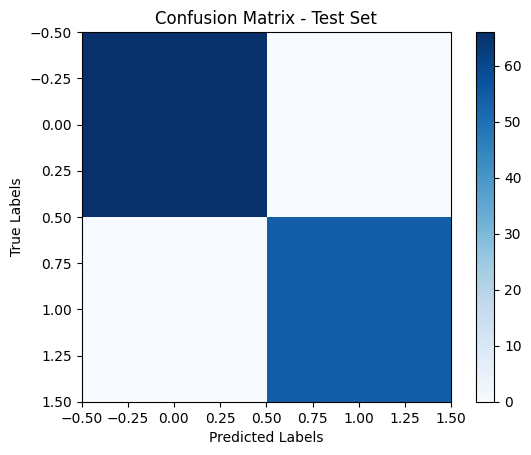


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        66
        True       1.00      1.00      1.00        54

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print()
plt.imshow(confusion_mat, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report:")
print(classification_rep)

The performance scores on the test set are similar to those on the training set, this indicates that the model is not overfitting and can generalize well to unseen data.

### Visualize the tree generated in question 4.6

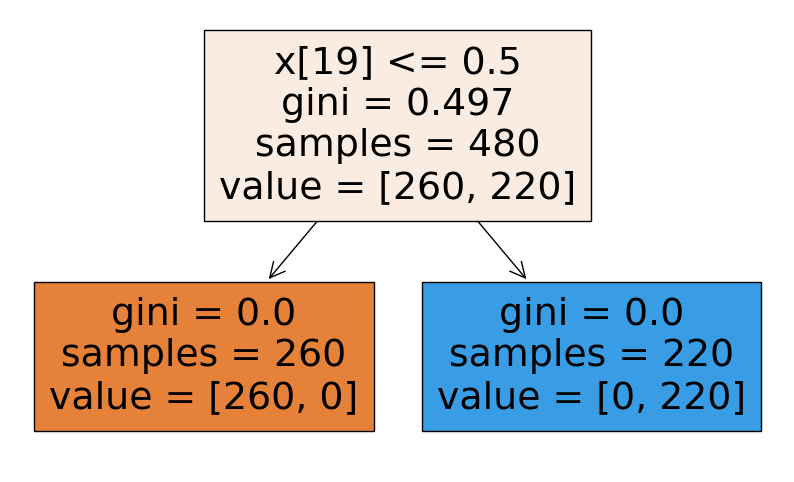

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=optimal_depth)

clf.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, filled=True)
plt.show()


### For each row in the test set, what is the probability of a customer to respond positively to a personal investment plan (pip = yes). Hint: use predict_proba.

In [34]:
probabilities = clf.predict_proba(X_test)

pip_yes_probabilities = probabilities[:, 1]

for i, prob in enumerate(pip_yes_probabilities):
    print(f"Row {i+1}: Probability of pip = yes: {prob}")


Row 1: Probability of pip = yes: 1.0
Row 2: Probability of pip = yes: 0.0
Row 3: Probability of pip = yes: 0.0
Row 4: Probability of pip = yes: 1.0
Row 5: Probability of pip = yes: 1.0
Row 6: Probability of pip = yes: 0.0
Row 7: Probability of pip = yes: 0.0
Row 8: Probability of pip = yes: 0.0
Row 9: Probability of pip = yes: 0.0
Row 10: Probability of pip = yes: 1.0
Row 11: Probability of pip = yes: 1.0
Row 12: Probability of pip = yes: 1.0
Row 13: Probability of pip = yes: 0.0
Row 14: Probability of pip = yes: 0.0
Row 15: Probability of pip = yes: 0.0
Row 16: Probability of pip = yes: 0.0
Row 17: Probability of pip = yes: 0.0
Row 18: Probability of pip = yes: 1.0
Row 19: Probability of pip = yes: 0.0
Row 20: Probability of pip = yes: 0.0
Row 21: Probability of pip = yes: 0.0
Row 22: Probability of pip = yes: 1.0
Row 23: Probability of pip = yes: 0.0
Row 24: Probability of pip = yes: 0.0
Row 25: Probability of pip = yes: 0.0
Row 26: Probability of pip = yes: 1.0
Row 27: Probability o

### Which customers have the highest probability of responding positively to a pip offer? 

In [35]:
probabilities = clf.predict_proba(X_test)

pip_yes_probabilities = probabilities[:, 1]

top_customers_indices = pip_yes_probabilities.argsort()[::-1]

for i in top_customers_indices:
    print(f"Customer {i+1}: Probability of pip = yes: {pip_yes_probabilities[i]}")


Customer 60: Probability of pip = yes: 1.0
Customer 81: Probability of pip = yes: 1.0
Customer 47: Probability of pip = yes: 1.0
Customer 48: Probability of pip = yes: 1.0
Customer 50: Probability of pip = yes: 1.0
Customer 55: Probability of pip = yes: 1.0
Customer 57: Probability of pip = yes: 1.0
Customer 58: Probability of pip = yes: 1.0
Customer 59: Probability of pip = yes: 1.0
Customer 64: Probability of pip = yes: 1.0
Customer 65: Probability of pip = yes: 1.0
Customer 67: Probability of pip = yes: 1.0
Customer 71: Probability of pip = yes: 1.0
Customer 72: Probability of pip = yes: 1.0
Customer 74: Probability of pip = yes: 1.0
Customer 76: Probability of pip = yes: 1.0
Customer 77: Probability of pip = yes: 1.0
Customer 43: Probability of pip = yes: 1.0
Customer 42: Probability of pip = yes: 1.0
Customer 41: Probability of pip = yes: 1.0
Customer 22: Probability of pip = yes: 1.0
Customer 4: Probability of pip = yes: 1.0
Customer 5: Probability of pip = yes: 1.0
Customer 10: 